### Plotting a Density Diagram for Gaussian Error Curves
... with a sum curve

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import csv
age=[]
err=[]
with open('agedata.txt') as csvfile:
    plots=csv.reader(csvfile, delimiter='\t')
    next(plots)
    for row in plots:
        age.append(float(row[0]))
        err.append(float(row[1]))
gd=np.zeros((np.size(age),2,60))
        

In [127]:
def gy(ag, error):
    data=np.linspace(ag - 3. * error, ag+3*error, 60)
    y=np.zeros(np.size(data), dtype=float)
    results=np.zeros(shape=(2, np.size(data)))
    i=0
    for x in data:
        y[i]= 1/(error * np.sqrt(2*np.pi)) * np.exp(-np.power((x-ag),2)/2/np.power(error,2))
        i=i+1
    results[0,:]=data
    results[1,:]=y
    return results

def fun_sumcurve(ages, errors):
    data=np.linspace(100, 900, 200)
    y=np.zeros(np.size(data), dtype=float)
    results=np.zeros(shape=(2, np.size(data)))
    j=0   
    for index, value in enumerate(data):
        y[index]=0
        for count, age in enumerate(ages):
            y[index]= y[index] + 1/(errors[count] * np.sqrt(2*np.pi)) * np.exp(-np.power((value-age),2)/2/np.power(errors[count],2))            
    results[0,:]=data
    results[1,:]=y
    return results

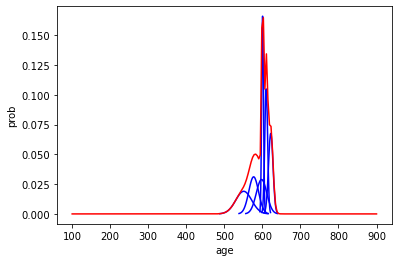

In [128]:
i=0
for x in age:
    gd[i,:,:]=gy(x, err[i])
    i=i+1

fig, ax1 = plt.subplots()
ax1.set_xlabel('age')
ax1.set_ylabel('prob')

i=0
while i < np.size(age):
    ax1.plot(gd[i,0,:],gd[i,1,:], color='blue', label='blah')
    i=i+1

sumcurve = np.zeros(shape=(2, 200))
sumcurve = fun_sumcurve(age, err)
ax1.plot(sumcurve[0,:], sumcurve[1,:], color='red', label='blah')
